**Image Processing**

---
**Flower Recognition**



---



---




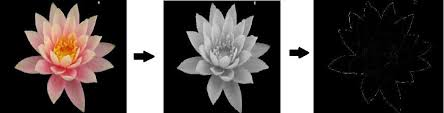

**Overview of Dataset**

---



---



*   This dataset contains 4242 images of flowers.
*   The pictures are divided into five classes: daisy, tulip, rose, sunflower, dandelion. 
*   For each class there are about 800 photos.
*   Photos are not high resolution, about 320x240 pixels. 
*   Photos are not reduced to a single size, they have different proportions!







## Daisy

---

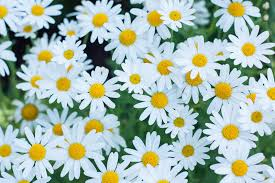

Sunflower


---

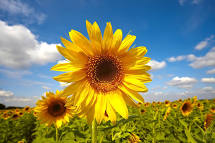


Tulip

---

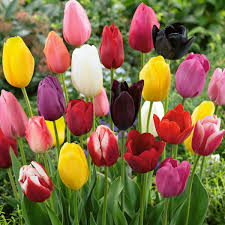

Dandelion

---

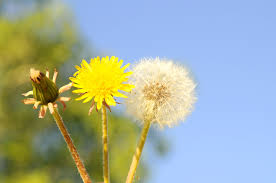

Rose

---
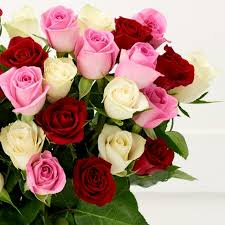


In [ ]:
!kaggle datasets download -d 'alxmamaev/flowers-recognition' -p /content/drive/MyDrive/Master/

 97% 436M/450M [00:02<00:00, 137MB/s]
100% 450M/450M [00:02<00:00, 157MB/s]


In [ ]:
!ls "/content/drive/My Drive/Master"

FlowerRcognition    IntruductionToColab.pptx  ssh_files
introduction.ipynb  shortcut_key_pycharm.txt


In [ ]:
!unzip "/content/drive/MyDrive/Master/ColabNotebooks/ColabWorkshop1400-04-16/FlowerRcognition" -d "/content/drive/MyDrive/Master/ColabNotebooks/ColabWorkshop1400-04-16/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/Master/flowers/flowers/rose/110472418_87b6a3aa98_m.jpg  
  inflating: /content/drive/My Drive/Master/flowers/flowers/rose/11102341464_508d558dfc_n.jpg  
  inflating: /content/drive/My Drive/Master/flowers/flowers/rose/11233672494_d8bf0a3dbf_n.jpg  
  inflating: /content/drive/My Drive/Master/flowers/flowers/rose/11694025703_9a906fedc1_n.jpg  
  inflating: /content/drive/My Drive/Master/flowers/flowers/rose/118974357_0faa23cce9_n.jpg  
  inflating: /content/drive/My Drive/Master/flowers/flowers/rose/11944957684_2cc806276e.jpg  
  inflating: /content/drive/My Drive/Master/flowers/flowers/rose/12165480946_c4a3fe182d_n.jpg  
  inflating: /content/drive/My Drive/Master/flowers/flowers/rose/12202373204_34fb07205b.jpg  
  inflating: /content/drive/My Drive/Master/flowers/flowers/rose/12238827553_cf427bfd51_n.jpg  
  inflating: /content/drive/My Drive/Master/flowers/flowers/rose/12240165555_98625b1e88_n.jpg

**import necessary modules**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "/content/drive/My Drive/Master/IntroductionToColab/FlowerRcognition/flowers" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Master/IntroductionToColab/FlowerRcognition/flowers'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/Master/IntroductionToColab/FlowerRcognition/flowers/flowers/tulip/13923539227_bdab038dc8.jpg
/content/drive/My Drive/Master/IntroductionToColab/FlowerRcognition/flowers/flowers/tulip/13472141763_f2517e7f0d.jpg
/content/drive/My Drive/Master/IntroductionToColab/FlowerRcognition/flowers/flowers/tulip/13999402743_f563f6b685_n.jpg
/content/drive/My Drive/Master/IntroductionToColab/FlowerRcognition/flowers/flowers/tulip/12916135413_dafcf3089e_n.jpg
/content/drive/My Drive/Master/IntroductionToColab/FlowerRcognition/flowers/flowers/tulip/13910737760_c71c8b6ff2.jpg
/content/drive/My Drive/Master/IntroductionToColab/FlowerRcognition/flowers/flowers/tulip/14054827391_139fb54432.jpg
/content/drive/My Drive/Master/IntroductionToColab/FlowerRcognition/flowers/flowers/tulip/10164073235_f29931d91e.jpg
/content/drive/My Drive/Master/IntroductionToColab/FlowerRcognition/flowers/flowers/tulip/13509967925_eaaeefa396_m.jpg
/conten

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.applications import VGG19
from keras.applications.resnet import ResNet50
import cv2
import os
import random
import tensorflow as tf

**Loading the Dataset**

In [ ]:
labels = ['dandelion', 'daisy','tulip','sunflower','rose']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
data = get_data("/content/drive/MyDrive/Master/ColabNotebooks/ColabWorkshop1400-04-16/FlowerRcognition/flowers")

**Data Visualization and Preprocessing**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


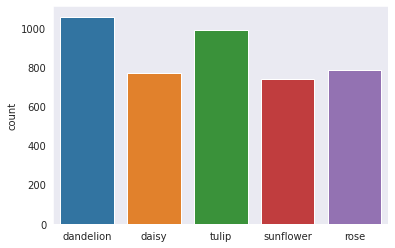

In [ ]:
l = []
for i in data:
    l.append(labels[i[1]])
sns.set_style('dark')
sns.countplot(l)

The dataset seems balanced as for each training label , enough training examples exist

**Randomly Previewing first 10 images**

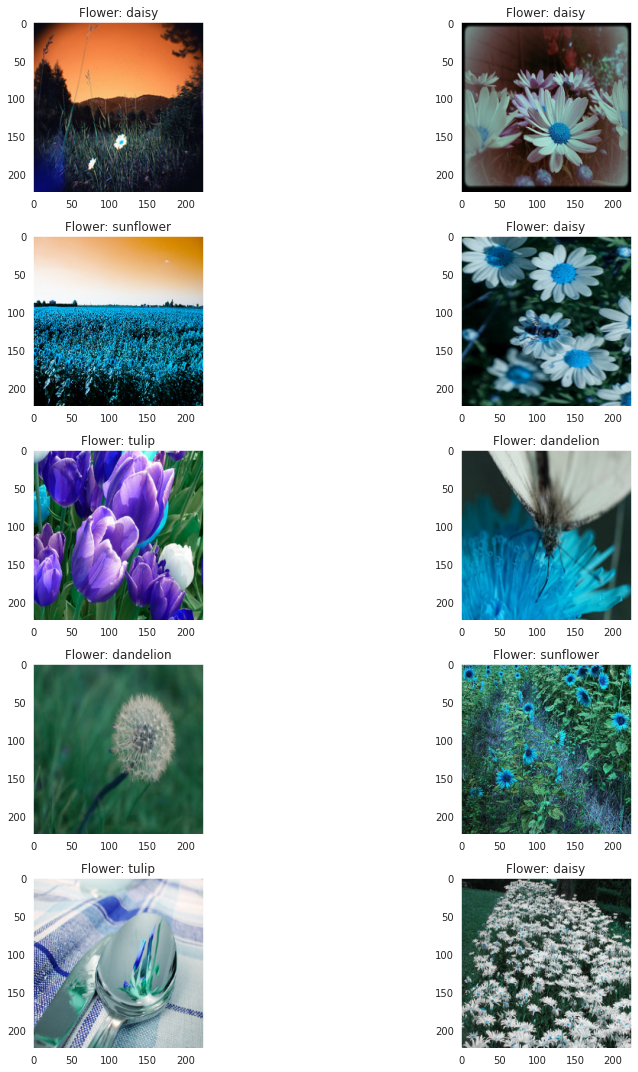

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l][0])
        ax[i,j].set_title('Flower: '+labels[data[l][1]])
        
plt.tight_layout()

We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].

In [ ]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

In [ ]:
import numpy as np

# Normalize the data
x = np.array(x) / 255

In [ ]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's 
x = x.reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , stratify = y , random_state = 0)

**CONVOLUTIONAL NEURAL NETWORKS TO THE RESCUE**





---

A Convolutional Neural Network is a special type of an Artificial 
Intelligence implementation which uses a special mathematical matrix manipulation called the convolution operation to process data from the images.

---


*   A **convolution** does this by multiplying two matrices and yielding a third, smaller matrix.
*   The Network takes an input image, and uses a filter (or **kernel**) to create a **feature map** describing the image.


*   In the convolution operation, we take a filter (usually 2x2 or 3x3 matrix ) and **slide** it over the image matrix. The coresponding numbers in both matrices are multiplied and and added to yield a single number describing that input space. This process is repeated all over the image.This can be seen in the following animation.







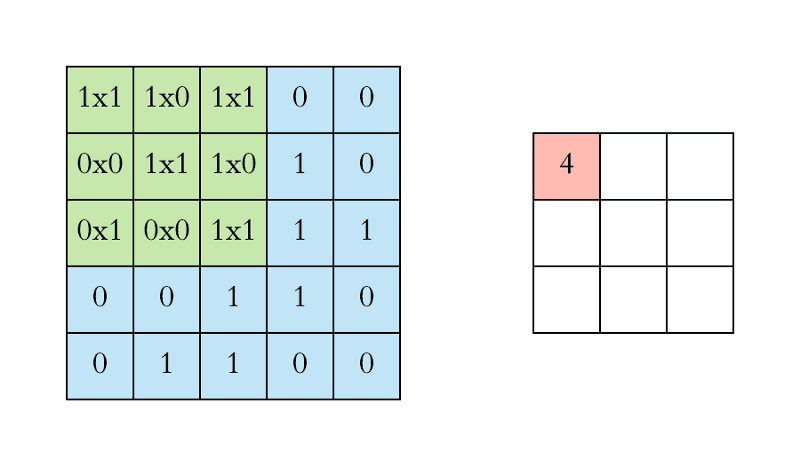

----> This is a 2-D representation of calculations happening in 3 dimensions. This is what is actually happening

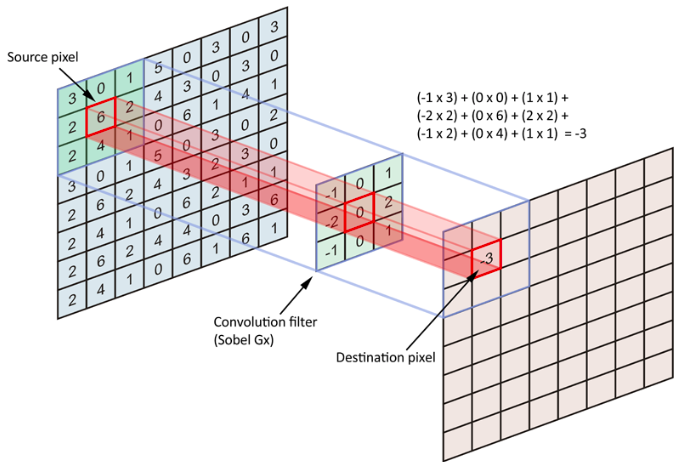



*   We use different filters to pass over our inputs, and take all the feature maps, put them together as the final output of the convolutional layer.
*   We then pass the output of this layer through a non-linear activation function. The most commonly used one is ReLU.


*   The next step of our process involves further reducing the dimensionality of the data which will lower the computation power required for training this model. This is achieved by using a **Pooling Layer**. The most commonly used one is **max pooling** which takes the maximum value in the window created by a filter. This significantly reduces the training time and preserves significant information.





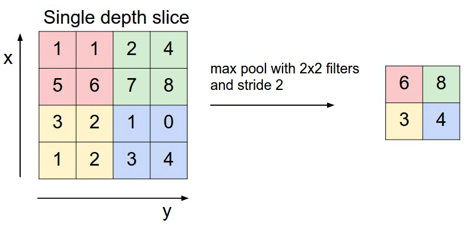



*   Two of the most commonly associated words with CNN are **stride** and **padding**

**STRIDE:** Stride just means the amount a filter moves during a covolution operation. So, a stride of 1 means that the filter will slide 1 pixel after each covolution operation as shown in this animation.

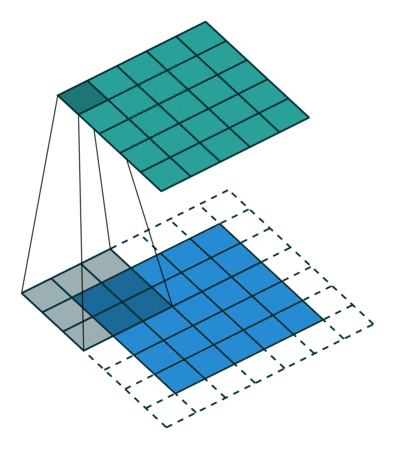

**PADDING:** Padding is just zero value pixels that surround the input image. This protects the loss of any valuable information since the feature map is ever shrinking.

In [ ]:
del x,y,data

In [ ]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


**Training The Model**

In [ ]:
with strategy.scope():
    pre_trained_model = VGG19(input_shape=(224,224,3), include_top=False, weights="imagenet")

    for layer in pre_trained_model.layers[:19]:
        layer.trainable = False

    model = Sequential([
        pre_trained_model,
        MaxPool2D((2,2) , strides = 2),
        Flatten(),
        Dense(5 , activation='softmax')])
    model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(x_train,y_train, batch_size = 64 , epochs = 12 , validation_data = (x_test, y_test),callbacks = [learning_rate_reduction])

Epoch 1/12
55/55 [==============================] - 22s 405ms/step - loss: 0.8977 - accuracy: 0.6512 - val_loss: 0.5037 - val_accuracy: 0.8182
Epoch 2/12
55/55 [==============================] - 20s 356ms/step - loss: 0.4204 - accuracy: 0.8453 - val_loss: 0.4921 - val_accuracy: 0.8159
Epoch 3/12
55/55 [==============================] - 20s 362ms/step - loss: 0.2693 - accuracy: 0.8986 - val_loss: 0.3878 - val_accuracy: 0.8654
Epoch 4/12
55/55 [==============================] - 20s 365ms/step - loss: 0.1591 - accuracy: 0.9418 - val_loss: 0.4321 - val_accuracy: 0.8596
Epoch 5/12
55/55 [==============================] - ETA: 0s - loss: 0.0834 - accuracy: 0.9721
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
55/55 [==============================] - 20s 368ms/step - loss: 0.0834 - accuracy: 0.9721 - val_loss: 0.4443 - val_accuracy: 0.8596
Epoch 6/12
55/55 [==============================] - 21s 378ms/step - loss: 0.0280 - accuracy: 0.9957 - val_loss: 0.4455 - 

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

28/28 [==============================] - 4s 150ms/step - loss: 0.4866 - accuracy: 0.8780
Loss of the model is -  0.48662760853767395
28/28 [==============================] - 4s 135ms/step - loss: 0.4866 - accuracy: 0.8780
Accuracy of the model is -  87.8020703792572 %


**Analysis after Model Training**

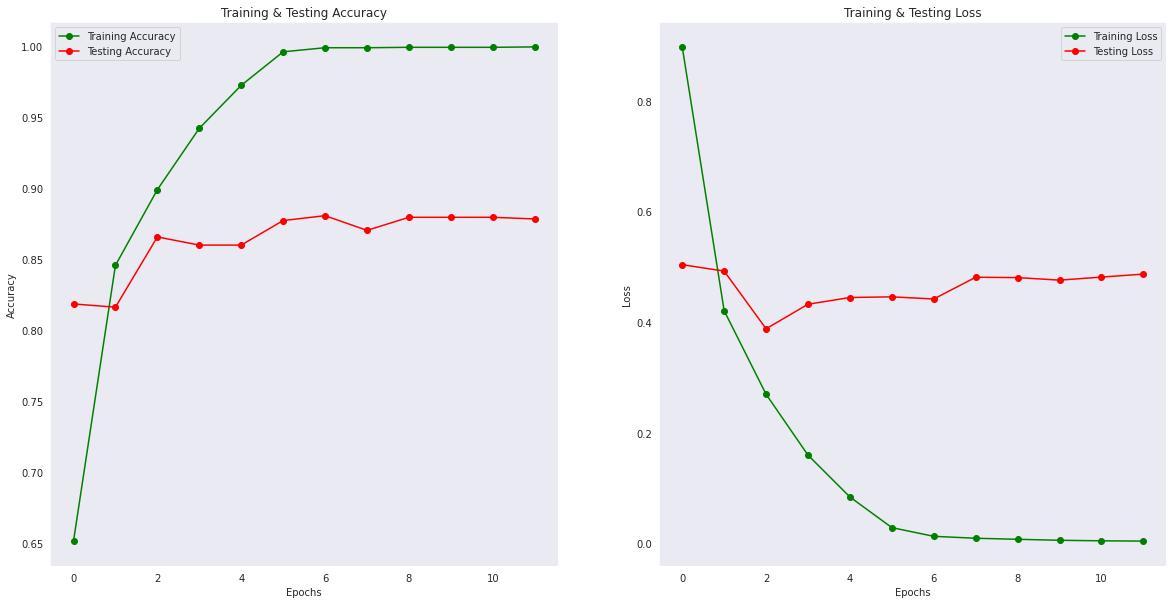

In [ ]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
predictions = model.predict_classes(x_test)
predictions[:5]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([2, 4, 3, 3, 3])

In [ ]:
y_test_inv = label_binarizer.inverse_transform(y_test)

In [ ]:
print(classification_report(y_test_inv, predictions, target_names = labels))

              precision    recall  f1-score   support

   dandelion       0.89      0.88      0.88       212
       daisy       0.86      0.86      0.86       154
       tulip       0.86      0.90      0.88       198
   sunflower       0.89      0.91      0.90       148
        rose       0.89      0.83      0.86       157

    accuracy                           0.88       869
   macro avg       0.88      0.88      0.88       869
weighted avg       0.88      0.88      0.88       869



In [ ]:
cm = confusion_matrix(y_test_inv,predictions)
cm

array([[186,  12,   3,   9,   2],
       [ 10, 133,   4,   2,   5],
       [  4,   3, 178,   4,   9],
       [  3,   2,   8, 135,   0],
       [  7,   4,  13,   2, 131]])

In [ ]:
cm = pd.DataFrame(cm , index = labels , columns = labels)

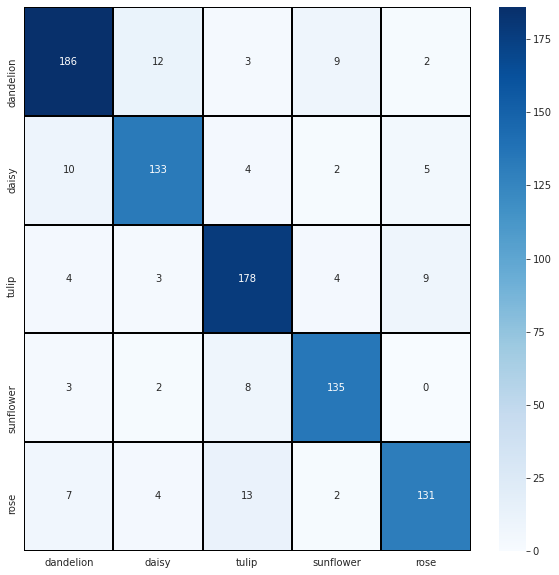

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = labels , yticklabels = labels)

**CORRECTLY CLASSIFIED FLOWER IMAGES**

In [ ]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test_inv)):
    if(y_test_inv[i] == predictions[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test_inv)):
    if(y_test_inv[i] != predictions[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

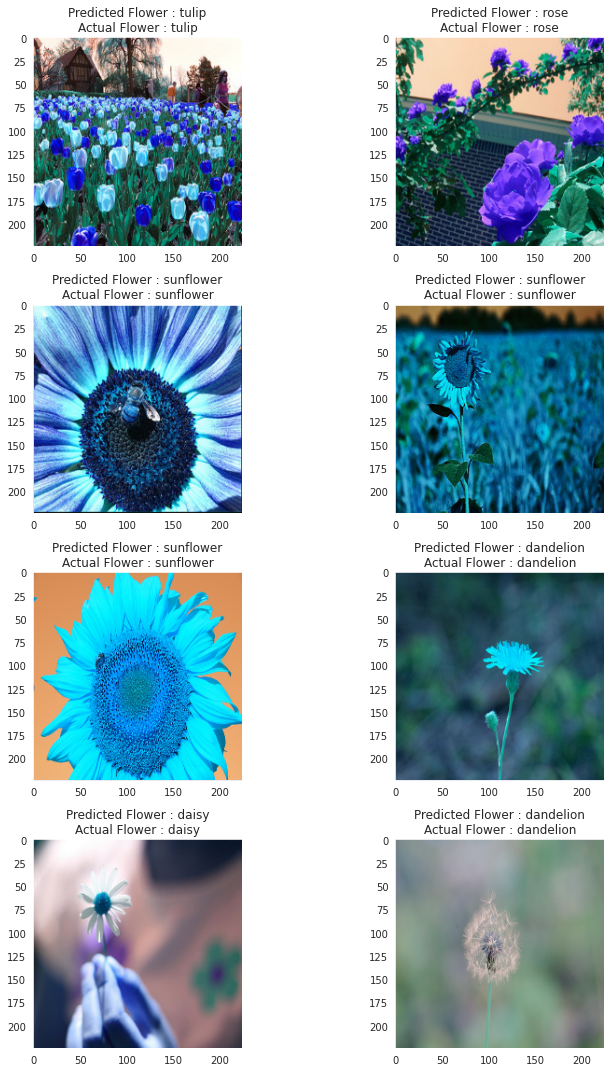

In [ ]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+ labels[predictions[prop_class[count]]] +"\n"+"Actual Flower : "+ labels[y_test_inv[prop_class[count]]])
        plt.tight_layout()
        count+=1

**INCORRECTLY CLASSIFIED FLOWER IMAGES**

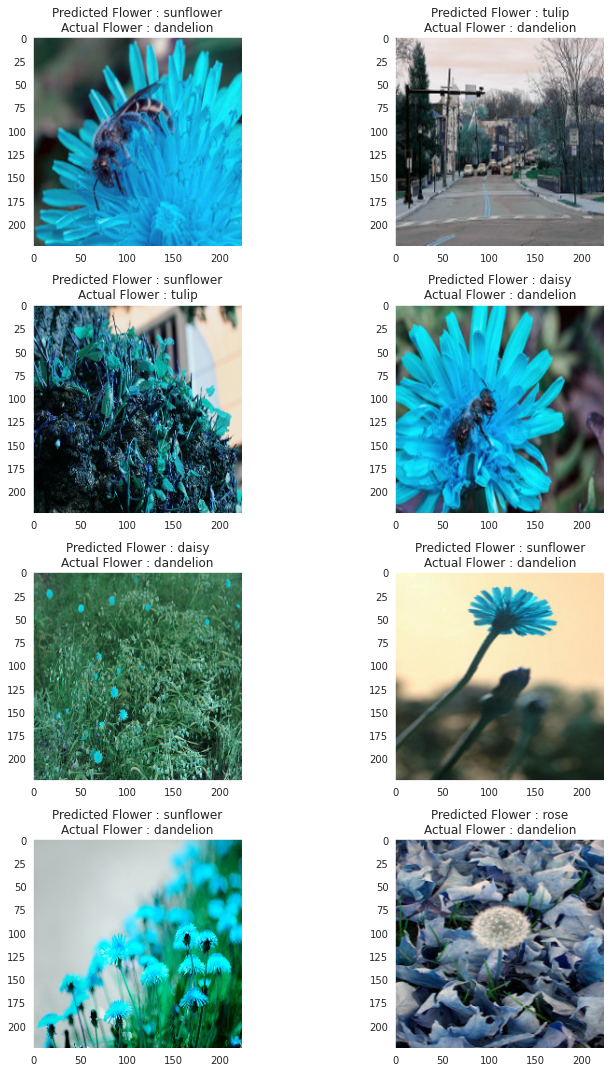

In [ ]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+labels[predictions[mis_class[count]]]+"\n"+"Actual Flower : "+labels[y_test_inv[mis_class[count]]])
        plt.tight_layout()
        count+=1